In [85]:
import folium;
import json;

geoJson=json.load(open('../data/campus-maps.geojson'))
campus_map1 = folium.Map(location=[55.9450167, -3.1894458],
                    zoom_start=13)
types = set()
for feature in geoJson['features']:
    types.add(feature['properties']['type'])

for type in types:
    typeValues={'type': "FeatureCollection","features": []}
    for feature in geoJson['features']:
        if (feature['properties']['type'] == type):
            typeValues['features'].append(feature);
    folium.GeoJson(typeValues,name=type).add_to(campus_map1)
    

 
folium.LayerControl().add_to(campus_map1)




campus_map1


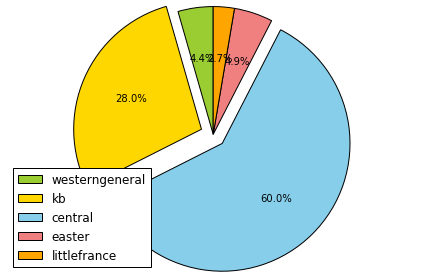

Number of data points per area


In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import  requests
from collections import Counter

# Load the data into a geoJson object
geoJson=json.load(open('../data/campus-maps.geojson'))

# Count the number of areas
c = Counter(feature['properties']['area'] for feature in geoJson['features'])
sizes = []
values = []
explode = []
for count in c:
    if (count!='general') and (count!='NULL'):
        #Add the values, sizes, and explode if over 50%
        values.append(count)
        sizes.append(c[count])
        if (c[count]>50):
            explode.append(0.1)
        else:
            explode.append(0.0)
labels = values
colors = ['yellowgreen', 'gold', 'skyblue', 'lightcoral','orange']
plt.pie(sizes, explode=explode,labeldistance=1.3,pctdistance=0.6, 
        autopct='%1.1f%%', shadow=False, startangle=90,colors=colors)

plt.legend(labels, loc="lower left")
plt.axis('equal')

#fig = plt.figure()
#ax = fig.gca()
plt.tight_layout()
plt.show()
print("Number of data points per area")